In [1]:
import pandas as pd 
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Read the data
df = pd.read_csv('./data/trainingData.csv')

In [2]:
# add the sentiment score to the dataframe add the dictionary rows as columns
df = df.join(pd.DataFrame(df['comment'].apply(sentiment.polarity_scores).tolist()))

In [3]:
df.head()

,comment,sentiment,review_rating,author_total_reviews_count,neg,neu,pos,compound
0,Not telkpm I pay R519 per month and can't sign...,0,1,3,0.000,0.966,0.034,0.0762
1,Please help me clear my name I can't even buy ...,0,1,3,0.050,0.788,0.161,0.8608
2,Untrustworthy business I was contacted if I wa...,0,1,50,0.072,0.900,0.028,-0.5994
3,telkom Have been in a fight with TELKOM since ...,0,1,1,0.203,0.730,0.066,-0.9669
4,"TELKOM Killarney Looting on Upgrade -10, \nSo ...",0,1,5,0.099,0.889,0.013,-0.9837


In [4]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
!pip install tensorflow.io

     ---------------------------------------- 22.9/22.9 MB 1.1 MB/s eta 0:00:00


In [9]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

df1k = df[:1000]

def progress_apply(df, func, *args, **kwargs):
    from tqdm import tqdm
    tqdm.pandas()
    return df.progress_apply(func, *args, **kwargs)

# vectorize the comments and monitor the progress
#df['comment_vector'] = progress_apply(df['comment'], lambda x: nlp(x).vector)

df1k['comment_vector'] = progress_apply(df1k['comment'], lambda x: nlp(x).vector)
df1k.head()

100%|██████████| 1000/1000 [00:48<00:00, 20.75it/s]
C:\Users\adgru\AppData\Local\Temp\ipykernel_7900\3337115353.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1k['comment_vector'] = progress_apply(df1k['comment'], lambda x: nlp(x).vector)


,comment,sentiment,review_rating,author_total_reviews_count,neg,neu,pos,compound,comment_vector
0,Not telkpm I pay R519 per month and can't sign...,0,1,3,0.000,0.966,0.034,0.0762,"[0.25556496, 0.08746679, 0.11655528, -0.298704..."
1,Please help me clear my name I can't even buy ...,0,1,3,0.050,0.788,0.161,0.8608,"[0.24544515, -0.03279207, -0.10688014, -0.1685..."
2,Untrustworthy business I was contacted if I wa...,0,1,50,0.072,0.900,0.028,-0.5994,"[0.2233982, -0.0018093835, 0.20441963, -0.1716..."
3,telkom Have been in a fight with TELKOM since ...,0,1,1,0.203,0.730,0.066,-0.9669,"[0.18760735, -0.037614163, -0.016246133, -0.24..."
4,"TELKOM Killarney Looting on Upgrade -10, \nSo ...",0,1,5,0.099,0.889,0.013,-0.9837,"[0.07541147, 0.030931279, 0.30048388, -0.10145..."


In [ ]:
# count sentiment scores for 


In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 
history = History()
# split the data into train and test
train_size = int(len(df1k) * .8)
train_comments = df1k['comment_vector'][:train_size]
train_scores = df1k[['neg', 'neu', 'pos', 'compound']][:train_size]
train_comment_vector = tf.convert_to_tensor(np.array(df1k['comment_vector'][:train_size].tolist()))
train_sentiment = df1k['sentiment'][:train_size]

test_comments = df1k['comment_vector'][train_size:]
test_scores = df1k[['neg', 'neu', 'pos', 'compound']][train_size:]
test_comment_vector = tf.convert_to_tensor(np.array(df1k['comment_vector'][train_size:].tolist()))
test_sentiment = df1k['sentiment'][train_size:]

# create the model to predict the sentiment
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# train the model
model.fit(train_comment_vector, train_sentiment, epochs=10, callbacks=[history])

# evaluate the model
test_loss, test_acc = model.evaluate(test_comment_vector, test_sentiment, verbose=2)
print('Test accuracy:', test_acc)

# save the model
model.save('./models/sentiment_model.h5')



Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 0.2897 - accuracy: 0.9625
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 6.7281e-04 - accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 3.8951e-04 - accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 2.7898e-04 - accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 2.0753e-04 - accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 1.5609e-04 - accuracy: 1.0000
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 1.1877e-04 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 9.2304e-05 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 7.2365e-05 - accu

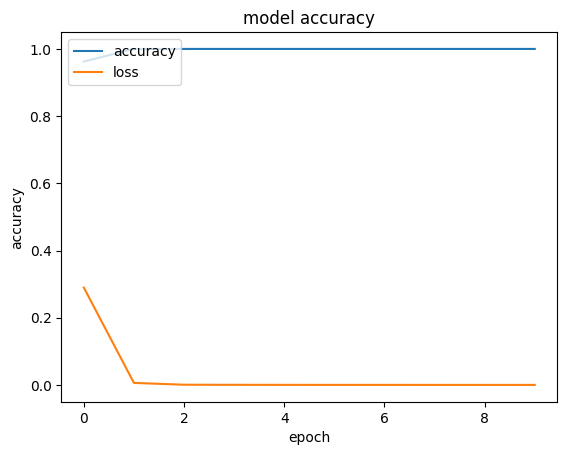

In [42]:
#plot the model using matplotlib
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [52]:
# make a prediction using a comment such as "I love this product"
comment = "This product is great"
comment_vector = tf.convert_to_tensor(np.array([nlp(comment).vector.tolist()]))
# get the sentiment score
sentiment = model.predict(comment_vector)

# round the sentiment score to 0 or 1 or 2
print(round(sentiment[0][0]))

1/1 [==============================] - 0s 32ms/step
0
